# Лабораторная работа №1
## по предмету "оптимальное управление"
```
Выполнил: студент гр. А-14м-16 Мигаль И.А
Проверил: Зубков Павел Валерьевич
```

In [1]:
import sys
sys.path.insert(0, '/home/ivmig/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/lab_1/')
print(sys.path)

['/home/ivmig/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/lab_1/', '', '/home/ivmig/anaconda3/lib/python36.zip', '/home/ivmig/anaconda3/lib/python3.6', '/home/ivmig/anaconda3/lib/python3.6/lib-dynload', '/home/ivmig/anaconda3/lib/python3.6/site-packages', '/home/ivmig/anaconda3/lib/python3.6/site-packages/Sphinx-1.5.6-py3.6.egg', '/home/ivmig/anaconda3/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg', '/home/ivmig/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/ivmig/.ipython']


In [2]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib import colors as mcolors
import utils

from utils import array
from utils import TDMA


colors = list(mcolors.BASE_COLORS)
colors += list(mcolors.CSS4_COLORS.keys())

Automatically created module for IPython interactive environment


In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Инициализация данных
```
    Обозначения см. в описании Л.Р. №1
    
```

In [4]:
# Словарь параметров
p_d = {}

In [5]:
# Заданные положительные величины
p_d['a'], p_d['l'], p_d['v'], p_d['T'] = 1., 1., 1., 2.

# Решение тестового примера
def x(s, t):
    return math.sin(t) + math.sin(s + math.pi / 2.)

# Плотность источников тепла
def f(s, t):
    return math.cos(t) + p_d['a'] ** 2 * math.sin(s + math.pi / 2.)
    
# Температура внешней среды
def p(t):
    #return 1. / p_d['v'] * math.cos(p_d['l'] + math.pi / 2) + math.sin(t) + math.sin(p_d['l'] + math.pi / 2)
    return 0.
    
# Распределение температуры в начальный момент времени
def fi(s):
    return math.sin(s + math.pi / 2.)

p_d['p(t)'] = p

p_d['f(s, t)'] = f

# Заданные числа
p_d['p_min'], p_d['p_max'], p_d['R'] = -.7, .7, 100.

p_d['fi(s)'] = fi

# Желаемое распределение температуры
def y(s):
    #return s * math.sin(s + math.pi / 2.)
    return math.sin(p_d['T']) + math.sin(s + math.pi / 2.)

p_d['y(s)'] = y

# Число точек на пространственной и временной сетке соответственно
N = 10
p_d['N'], p_d['M'] = N, 10 + N * N

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt']

(1.0, 2.0, 0.1, 0.01818181818181818)

---
# Создание модели и управление

In [6]:
model = utils.Lab1OptCtrlModel(p_d)

In [7]:
criterion = utils.criterion_3
get_alpha = utils.get_alpha_1

In [8]:
model.solve(criterion, get_alpha, eps=10**-5)

10000000.0
3.18527720976e-05
1.47066151413e-05
9.05112373881e-06


In [9]:
model.final_step

3

In [10]:
X_ = np.arange(0., p_d['l'] + p_d['dh'], p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'], p_d['dt'])

---
# Процесс управления

In [11]:
y_s = model.y_arr
bounds = [min(y_s), max(y_s)]

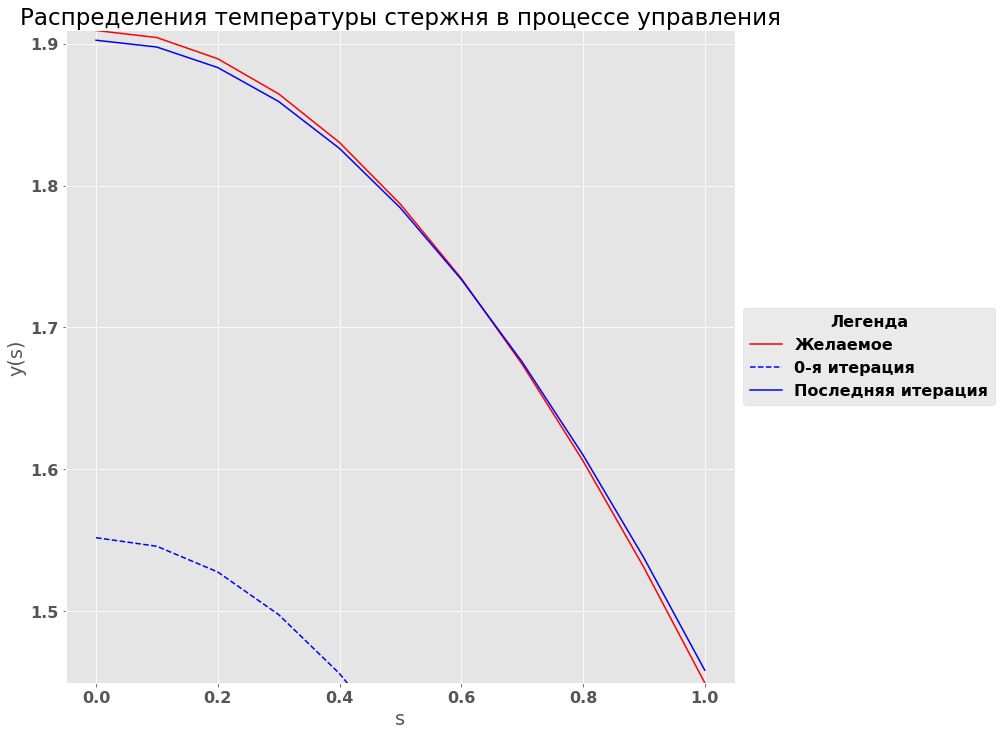

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
part = 1
count = 1
step = int(model.final_step / count / part)
for i in range(0, int(model.final_step / part), step):
    ax.plot(X_, model.x_arr[i][-1,:], color=colors[int(i / step)], linestyle='--', label='{}-я итерация'.format(i))
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Распределения температуры стержня в процессе управления')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Желаемое и полученное распределение температур

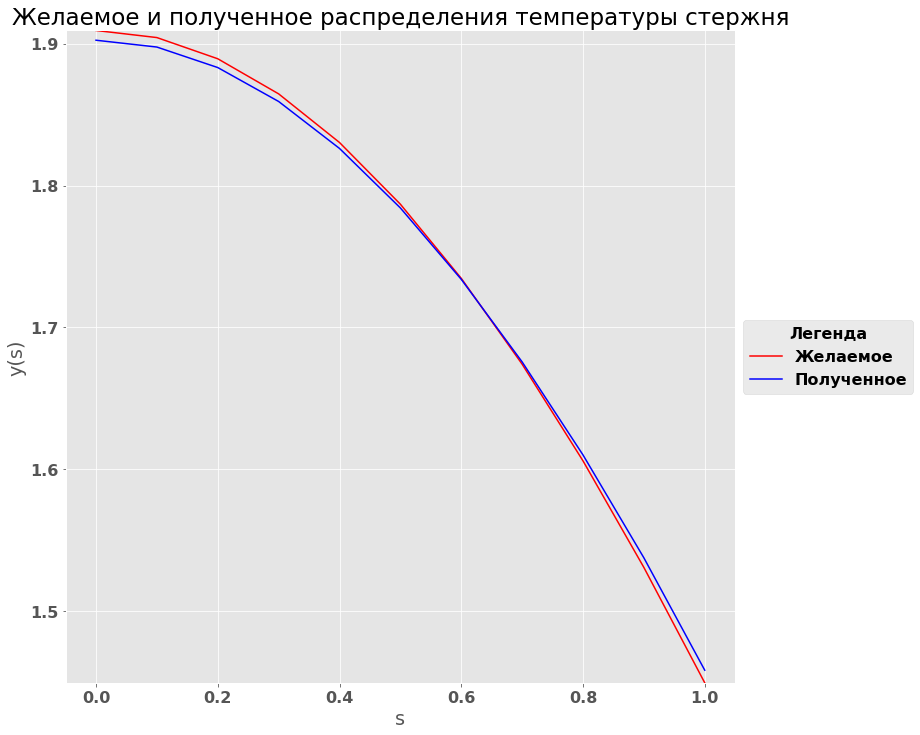

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Полученное')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Желаемое и полученное распределения температуры стержня')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Управление

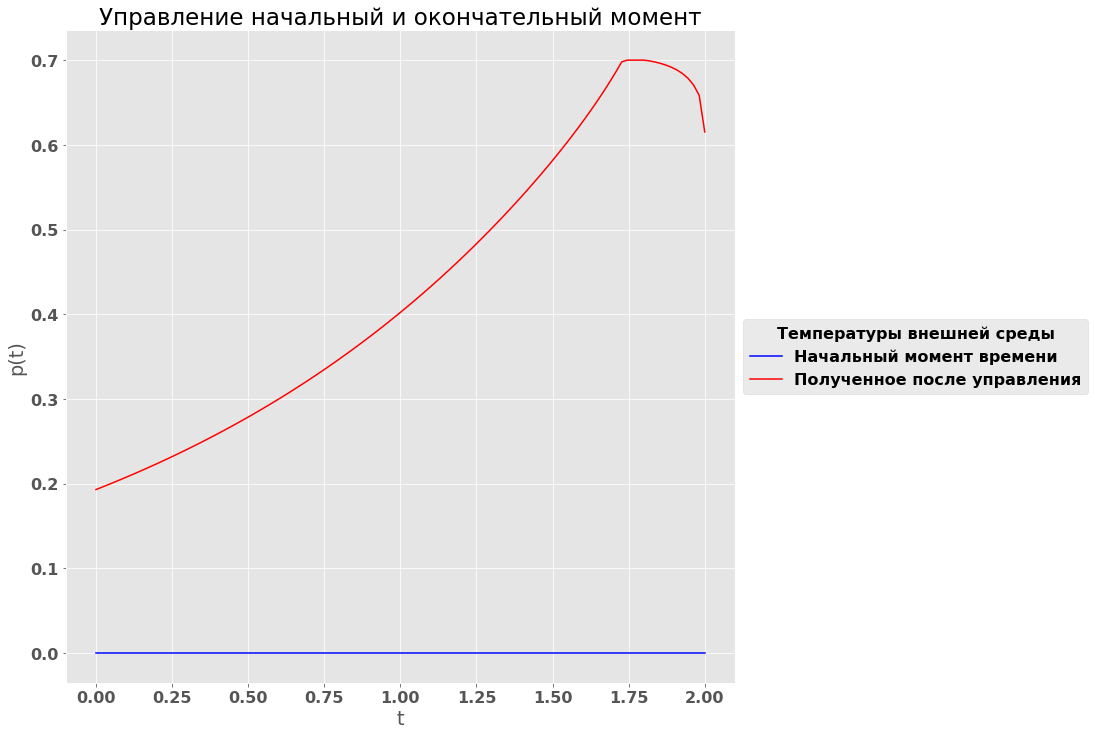

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Y_, model.p_arr[0], color='b', label='Начальный момент времени')
ax.plot(Y_, model.p_arr[-1], color='r', label='Полученное после управления')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Управление начальный и окончательный момент')
plt.legend(title='Температуры внешней среды', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# График изменения ошибки

(9.0511237388052911e-06, 0.10000905112373881)

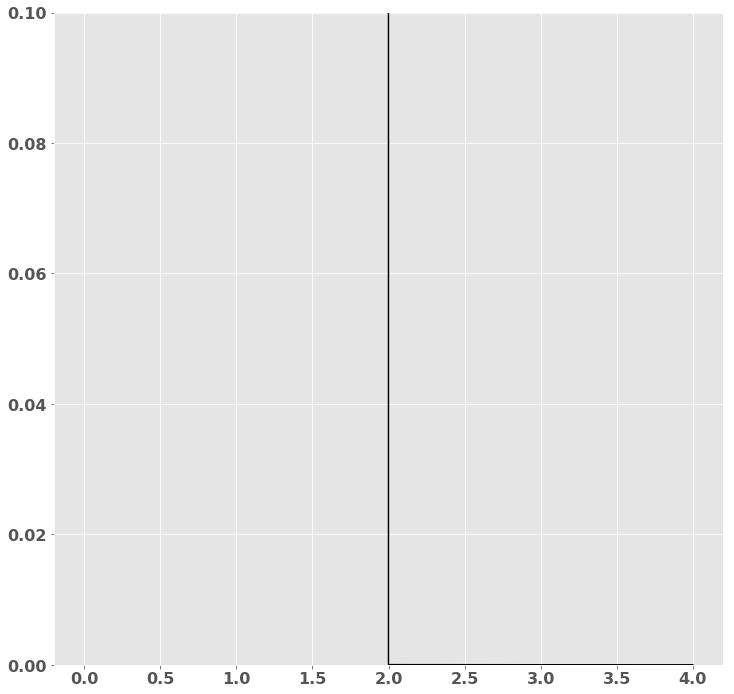

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(model.err, color='black', label='Ошибка')
ax.set_ylim([min(model.err), min(model.err) + .1])